# FAKE NEWS 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import os
import spacy
import keras
import tensorflow as tf 
from gensim.models import KeyedVectors 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from sklearn.model_selection import train_test_split  
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Embedding 
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [2]:
fake_data=pd.read_csv("Fake.csv")
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true_data=pd.read_csv("True.csv")
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_data["Label"] = "Fake"
true_data["Label"] = "True"

In [5]:
fake_data.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [6]:
true_data.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [7]:
display(fake_data.shape)
display(true_data.shape)

display(fake_data.isnull().sum())
display(true_data.isnull().sum())

(23481, 5)

(21417, 5)

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

<AxesSubplot:>

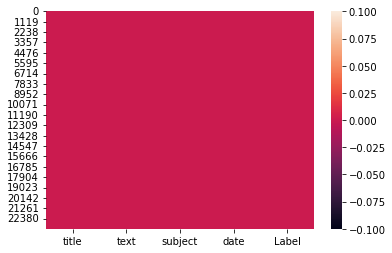

In [8]:
import seaborn as sns
sns.heatmap(fake_data.isnull())

<AxesSubplot:>

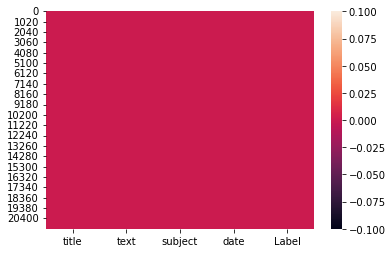

In [9]:
sns.heatmap(true_data.isnull())

In [10]:
print(fake_data.info())

print(true_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   Label    23481 non-null  object
dtypes: object(5)
memory usage: 917.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   Label    21417 non-null  object
dtypes: object(5)
memory usage: 836.7+ KB
None


In [11]:
fake_data.describe(include='all')

,title,text,subject,date,Label
count,23481,23481,23481,23481,23481
unique,17903,17455,6,1681,1
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017",Fake
freq,6,626,9050,46,23481


In [12]:
true_data.describe(include='all')

,title,text,subject,date,Label
count,21417,21417,21417,21417,21417
unique,20826,21192,2,716,1
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017",True
freq,14,8,11272,182,21417


In [13]:
fake_data.dtypes

title      object
text       object
subject    object
date       object
Label      object
dtype: object

In [14]:
true_data.dtypes

title      object
text       object
subject    object
date       object
Label      object
dtype: object

In [15]:
result_data = pd.concat([fake_data,true_data]).sample(frac = 1).reset_index(drop=True)

In [16]:
result_data.head()

,title,text,subject,date,Label
0,What Sarah Palin Just Asked Us To Do With Tru...,Like a stubborn cold that just doesn t seem to...,News,"May 28, 2016",Fake
1,Poland's new government wins vote of confidenc...,WARSAW (Reuters) - Poland s new government led...,worldnews,"December 13, 2017",True
2,#AnyoneButHillary: NEW POLL Shows Bernie Suppo...,Hillary may find out she needs more than black...,politics,"Apr 6, 2016",Fake
3,BREAKING! WIKILEAKS Releases Proof That Obama’...,BREAKING BOMBSHELL! All of the major political...,Government News,"Feb 16, 2017",Fake
4,Guess What UK Political Leaders Really Think ...,The British Parliament conducted what can only...,News,"January 18, 2016",Fake


In [17]:
result_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [18]:
result_data["Label"].value_counts()

Fake    23481
True    21417
Name: Label, dtype: int64

In [19]:
print("Shape of fake dataframe: " , fake_data.shape)

Shape of fake dataframe:  (23481, 5)


In [20]:
print("Shape of true dataframe: " , true_data.shape)

Shape of true dataframe:  (21417, 5)


In [21]:
print("Shape of dataframe: " , result_data.shape)

Shape of dataframe:  (44898, 5)


In [22]:
data=result_data.drop(['title' , 'subject' , 'date'], axis=1)
data.head()

,text,Label
0,Like a stubborn cold that just doesn t seem to...,Fake
1,WARSAW (Reuters) - Poland s new government led...,True
2,Hillary may find out she needs more than black...,Fake
3,BREAKING BOMBSHELL! All of the major political...,Fake
4,The British Parliament conducted what can only...,Fake


In [23]:
data['Label'].value_counts()

Fake    23481
True    21417
Name: Label, dtype: int64

In [24]:
data['Label_encode'] = data['Label'].map({'Fake' : 0 , 'True' :1})
data.head()

,text,Label,Label_encode
0,Like a stubborn cold that just doesn t seem to...,Fake,0
1,WARSAW (Reuters) - Poland s new government led...,True,1
2,Hillary may find out she needs more than black...,Fake,0
3,BREAKING BOMBSHELL! All of the major political...,Fake,0
4,The British Parliament conducted what can only...,Fake,0


In [25]:
(round(result_data[result_data['Label']=="Fake"].shape[0]/result_data.shape[0],2))*100

52.0

In [26]:
result_data.skew()

Series([], dtype: float64)

##### Data cleaning

In [27]:
total =result_data.isnull().sum().sort_values(ascending=False)
percent = (result_data.isnull().sum()/result_data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total,percent], axis=1, keys=['Total' ,'Percent'])
missing.head()

,Total,Percent
title,0,0.0
text,0,0.0
subject,0,0.0
date,0,0.0
Label,0,0.0


In [28]:
# concatinating both data frames, shuffling them and remove unnecessary columns

df = pd.concat([fake_data,true_data], axis=0)

#shuffles the whole data frame
df = df.sample(frac = 1)

#dropping unnecessary columns
df = df.drop('subject', axis=1)
df = df.drop('date' , axis=1)
df = df.drop('title' , axis=1)


In [29]:
# replacing the labels for integers, necessary for the loss function

df['Label'] = result_data['Label'].replace({'Fake':0, 'True':1})

print("Number of Fake Articles: ",len(df.loc[df['Label'] == 0]))
print("Number of True Articles: ",len(df.loc[df['Label'] == 1]))

df.head()

Number of Fake Articles:  23496
Number of True Articles:  21402


,text,Label
8364,Not a day goes by when a prominent figure on t...,0
4671,WASHINGTON (Reuters) - U.S. House of Represent...,0
23034,This week President Donald Trump followed thr...,0
18694,BERLIN (Reuters) - Chancellor Angela Merkel s ...,0
10877,WASHINGTON (Reuters) - The U.S. House of Repre...,0


### Regex for standardizing text

In [30]:
import re
new_sentences=[]
for article in df['text']:
    new_article=article.lower()
    new_article=re.sub(r'\d+','', new_article)
    new_article=re.sub(r'[^\w\s]','',new_article)
    new_article=new_article.strip()
    new_article=' '.join(new_article.split()[15:])
    new_sentences.append(new_article)

# adding new column with the standardized message
df['new_text'] = new_sentences
df.head()

,text,Label,new_text
8364,Not a day goes by when a prominent figure on t...,0,us that good guys with guns basically anyone c...
4671,WASHINGTON (Reuters) - U.S. House of Represent...,0,aims to move a tax reform bill through his com...
23034,This week President Donald Trump followed thr...,0,the us southern border with mexicoafter his vi...
18694,BERLIN (Reuters) - Chancellor Angela Merkel s ...,0,minister when wolfgang schaeuble leaves office...
10877,WASHINGTON (Reuters) - The U.S. House of Repre...,0,environmental regulators to act faster when le...


In [31]:
# split data into train and test data 70%-30%
train_x,test_x,train_y,test_y=train_test_split(df['new_text'],df['Label'],test_size=0.3,random_state=42) 

In [32]:
# the labels need to be in a list for matching data types during training
train_y_tolist = train_y.tolist()
test_y_tolist = test_y.tolist()

In [33]:
# restrict vocabulary to the 20000 most frequent words
num_words= 20000
tokenizer = Tokenizer(num_words=num_words) 

tokenizer.fit_on_texts(train_x) 

vocab_size = num_words 

train_x_seq=tokenizer.texts_to_sequences(train_x)
test_x_seq=tokenizer.texts_to_sequences(test_x)

In [34]:
# converting each sequence into a vector of dimension 15,000 by building the sum over all one-hot encoded vectors of the sequence
train_x_vec = []
for seq in train_x_seq:
    vector=[0]*vocab_size
    for w in seq:
        if w < vocab_size+1:
            vector[w-1]= vector[w-1] + 1
    train_x_vec.append(vector)

test_x_vec = []
for seq in test_x_seq:
    vector=[0]*vocab_size
    for w in seq:
        if w < vocab_size+1:
            vector[w-1]= vector[w-1] + 1
    test_x_vec.append(vector)

### Building the model

In [35]:
inputs = keras.Input(shape = (vocab_size,), dtype="int64")
outputs = layers.Dense(1, activation="sigmoid")(inputs)
model = keras.Model(inputs, outputs)

model.compile(loss='mse',optimizer='SGD',metrics=['accuracy'])
epochs=30

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense (Dense)               (None, 1)                 20001     
                                                                 
Total params: 20,001
Trainable params: 20,001
Non-trainable params: 0
_________________________________________________________________


In [36]:
x=df["text"]
y=df["Label"]

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=100)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
text_clf=Pipeline([("tfidf", TfidfVectorizer()),
                           ("clf" , LinearSVC())
                          ])

text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [38]:
predictions=text_clf.predict(X_test)

In [39]:
X_train_convert = np.stack(X_train)
X_test_convert = np.stack(X_test)

In [40]:
from sklearn import metrics
print("accuracy score :",metrics.accuracy_score(y_test,predictions))
print("confusion matrix : " ,metrics.confusion_matrix(y_test,predictions))
print("classification report:" ,metrics.classification_report(y_test,predictions))

accuracy score : 0.4985489640278059
confusion matrix :  [[4259 3468]
 [3962 3128]]
classification report:               precision    recall  f1-score   support

           0       0.52      0.55      0.53      7727
           1       0.47      0.44      0.46      7090

    accuracy                           0.50     14817
   macro avg       0.50      0.50      0.50     14817
weighted avg       0.50      0.50      0.50     14817



In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
fake_data.head(2)

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake


In [42]:
tfidf=TfidfVectorizer(max_df=0.95,min_df=2,stop_words="english")
dtm=tfidf.fit_transform(fake_data["text"])

In [43]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=6, init='nndsvda' ,random_state=100)
nmf_model.fit(dtm)

NMF(init='nndsvda', n_components=6, random_state=100)

In [44]:
for index, topic in enumerate(nmf_model.components_):
    print(f'the top 15 words for topic #{index}' )
    print([tfidf.get_feature_names_out ()[i] for i in topic.argsort()[-15: ]])
    print('\n')

the top 15 words for topic #0
['supporters', 'said', 'white', 'featured', 'people', 'like', 'republican', 'image', 'just', 'realdonaldtrump', 'twitter', 'campaign', 'president', 'donald', 'trump']


the top 15 words for topic #1
['house', 'senate', 'america', 'republican', 'american', 'government', 'united', 'said', 'state', 'people', 'court', 'states', 'republicans', 'president', 'obama']


the top 15 words for topic #2
['spore', 'pst', 'hesher', 'alternate', 'episode', 'tune', 'animals', 'broadcast', '00', 'join', 'radio', 'room', 'pm', 'acr', 'boiler']


the top 15 words for topic #3
['party', 'candidate', 'presidential', 'secretary', 'election', 'state', 'bernie', 'democratic', 'email', 'emails', 'foundation', 'campaign', 'sanders', 'hillary', 'clinton']


the top 15 words for topic #4
['officials', 'house', 'james', 'security', 'flynn', 'putin', 'information', 'director', 'news', 'intelligence', 'investigation', 'russian', 'comey', 'russia', 'fbi']


the top 15 words for topic #5


In [45]:
topic_results=nmf_model.transform(dtm)
topic_results.argmax(axis=1)
fake_data["topics"]=topic_results.argmax(axis=1)

In [46]:
fake_data.head(5)

,title,text,subject,date,Label,topics
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,4
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,5
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,1


###### saving weights for further analysis

In [48]:
weights = model.get_weights() 

In [49]:
import heapq

heapq.nsmallest(5, range(len(weights[0])), key=weights[0].__getitem__)

[3335, 12722, 16731, 1422, 878]

In [50]:
heapq.nlargest(5, range(len(weights[0])), key=weights[0].__getitem__)

[5767, 15365, 14838, 14261, 4121]

In [51]:
k = 0
for item in tokenizer.word_index.items():
    if k < 350:
        print(item)
        k += 1

('the', 1)
('to', 2)
('of', 3)
('and', 4)
('a', 5)
('in', 6)
('that', 7)
('on', 8)
('s', 9)
('for', 10)
('is', 11)
('he', 12)
('said', 13)
('it', 14)
('with', 15)
('was', 16)
('trump', 17)
('as', 18)
('by', 19)
('his', 20)
('has', 21)
('be', 22)
('have', 23)
('not', 24)
('from', 25)
('this', 26)
('at', 27)
('are', 28)
('who', 29)
('they', 30)
('an', 31)
('but', 32)
('i', 33)
('we', 34)
('us', 35)
('would', 36)
('about', 37)
('will', 38)
('their', 39)
('president', 40)
('had', 41)
('you', 42)
('t', 43)
('were', 44)
('been', 45)
('people', 46)
('or', 47)
('more', 48)
('which', 49)
('she', 50)
('her', 51)
('after', 52)
('one', 53)
('its', 54)
('if', 55)
('all', 56)
('out', 57)
('what', 58)
('also', 59)
('when', 60)
('state', 61)
('there', 62)
('new', 63)
('up', 64)
('no', 65)
('over', 66)
('our', 67)
('states', 68)
('government', 69)
('can', 70)
('house', 71)
('so', 72)
('than', 73)
('clinton', 74)
('other', 75)
('him', 76)
('some', 77)
('obama', 78)
('could', 79)
('just', 80)
('told', 81

In [54]:
fake_data.head(2)

,title,text,subject,date,Label,topics
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,4


In [56]:
result_data.head()

,title,text,subject,date,Label
0,JUDGE JEANINE PIRRO Hammers Hillary’s Foreign ...,Judge Jeanine: I wasn t even going to do an op...,politics,"Dec 19, 2015",Fake
1,Trump Is LITERALLY Kicking Off His 2020 Re-El...,"For the third time in a row, Trump will head d...",News,"February 15, 2017",Fake
2,McConnell SUPPRESSED Info That Russia Worked ...,As news that the CIA had solid evidence that R...,News,"December 10, 2016",Fake
3,NOT KIDDING: Obama’s Weak Immigrant Vetting Pr...,This new information just adds more validity T...,politics,"Aug 20, 2016",Fake
4,U.S. senator says Russia can expect sanctions ...,RIGA/TALLINN (Reuters) - Russia and its presid...,politicsNews,"December 28, 2016",True


# Thank you